# Non-linear regression using the sine function
**Purpose:** Use a sine function to fit a smooth curve through some data points using non-linear least squares  
**Author:** Geoff Nightingale  
**Date:** 09/06/2021

### Contents
<a href='#s1'> 1. Introduction </a>  
<a href='#s2'> 2. Data generation </a>  
<a href='#s3'> 3. Training a model </a>  
<a href='#s4'> 4. Fitting models to randomly generated datasets </a>  
<a href='#s5'> 5. Manual adjustment of curves </a>  
<a href='#s6'> 6. Adding segmentation </a>  


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

### 1 . Introduction <a id='s1'></a>

#### Premise
Use a sine function to fit a smooth curve to some data points.

Let $ x $ represent a variable, say time on book.

We will fit the following function to the data by finding the optimal parameters for $ w $:   

$ \hat y = f(x;w) = w_0 + w_1Sin(w_2x + w_3) $

#### Why use a sine function?
The sine function has been chosen for the following reasons:
1. It can model a wide range of data shapes with relatively few model parameters 
2. The form of the models will always be consistent i.e there are only ever 4 parameters regardless of the underlying data we are trying to model
2. The fitted model can be easily implemented in MS Excel
3. The optimised model parameters can be easily tweaked to modify the modelled curves


### 2. Data generation <a id='s2'></a>
First let's generate some data...

In [44]:
# Create some dummy data and plot it
n = 60

def generate_params(a_bound=3, b_bound=3, c_bound=3, d_bound=3):
    """
    Randomly selects parameters from a uniform distribution to use
    in sine based data generation
    """
    a = np.random.uniform(-a_bound, a_bound)
    b = np.random.uniform(-b_bound, b_bound)
    c = np.random.uniform(-c_bound, c_bound)
    d = np.random.uniform(-d_bound, d_bound)
    
    return a, b, c, d


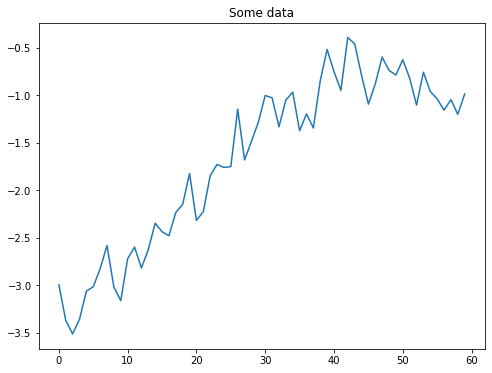

In [50]:
# Create some dummy data and plot it
a, b, c, d = generate_params()

x = np.arange(n)
y = a + b * np.sin(c*x/20.0 + d) + np.random.normal(0, 0.2, size=(n, 1)).flatten()

plt.figure(figsize=(8, 6))
plt.title('Actual vs Predicted')
plt.title('Some data')
plt.plot(y)
plt.show()

### 3. Training a model <a id='s3'></a>
Let's train a model using the least squares method from scipy and Levenberg-Marquardt

A good paper on Levenberg-Marquardt here: http://people.duke.edu/~hpgavin/ce281/lm.pdf


In [51]:
# Model functions
def sine_model_residuals(w, x, y):
    """ Function to compute residuals """
    return (w[0] + w[1] * np.sin(w[2] * x + w[3])) - y

def ls_pred(x, w):
    """ Create predictions """
    return (w[0] + w[1] * np.sin(w[2] * x + w[3]))

# Initial weights
w = np.array([0.01, 0.0, 0.0, 0.1])

In [52]:
# Train the model using Levenberg-Marquardt
ls = least_squares(sine_model_residuals, w, args=(x, y), method='lm')
pred = ls_pred(x, ls.x)

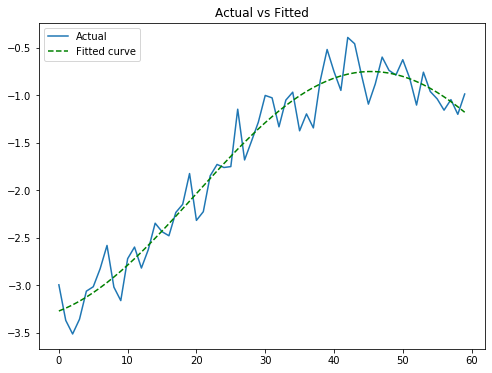

In [53]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.title('Actual vs Fitted')
plt.plot(y, label='Actual')
plt.plot(pred, label='Fitted curve', color='green', linestyle='--')
plt.legend()
plt.show()

In [54]:
# Check fitted weights
print(ls.x)

[-2.05123651  1.29975254  0.0613911  -1.21530939]


### 4. Fitting models to randomly generated datasets <a id='s4'></a>
Let's see how well this technique works on a bunch of randomly generated data. 

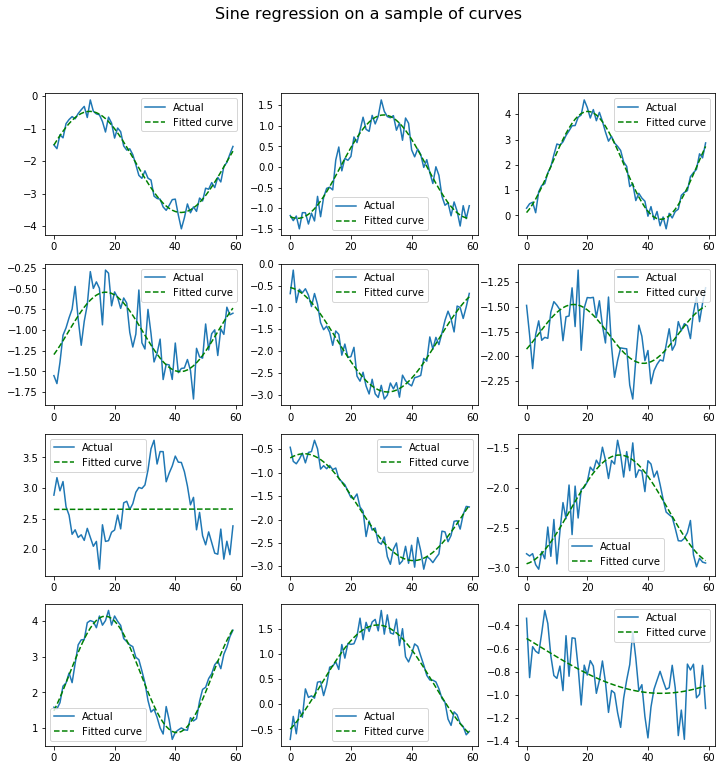

In [55]:
rows = 4
cols = 3

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 12))
fig.suptitle('Sine regression on a sample of curves', fontsize=16)
# fig.tight_layout()

params = []
for i in range(rows):
    for j in range(cols):
    
        # Create some dummy data 
        n = 60
        a, b, c, d = generate_params()
        x = np.arange(n)
        y = a + b * np.sin(c*x/20.0 + d) + np.random.normal(0, 0.2, size=(n, 1)).flatten()

        # Train the model
        ls = least_squares(sine_model_residuals, w, args=(x, y), method='lm')
        pred = ls_pred(x, ls.x)
        
        # Add parameters to list
        params.append(ls.x.tolist())

        # Plot actual vs predicted
        ax[i, j].plot(y, label='Actual')
        ax[i, j].plot(pred, label='Fitted curve', color='green', linestyle='--')
        ax[i, j].legend()
        
plt.show()

### 5. Manual adjustment of curves <a id='s5'></a>
Demonstration of updating parameters to change curve profile.

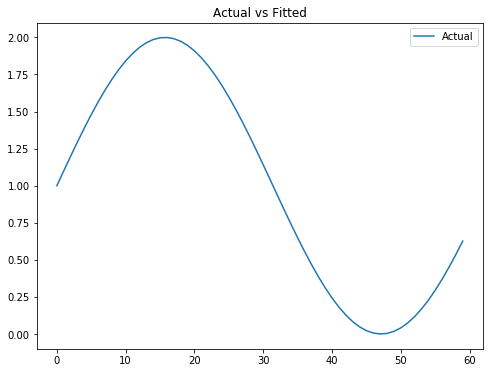

In [56]:
# Create some dummy data and plot it
a, b, c, d = 1.0, 1.0, 1.0, 0.0

n = 60
x = np.arange(n)
y = a + b * np.sin(c*x/10.0 + d)

# Train the model
ls = least_squares(sine_model_residuals, w, args=(x, y), method='lm')

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.title('Actual vs Fitted')
plt.plot(y, label='Actual')
plt.legend()
plt.show()

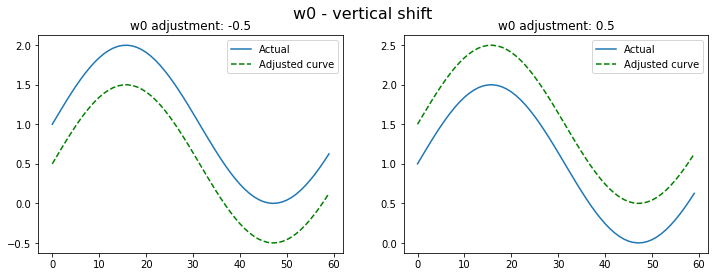

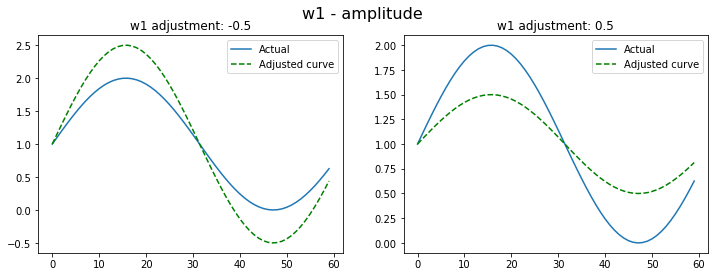

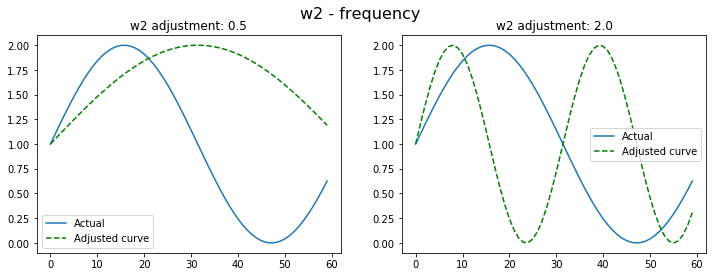

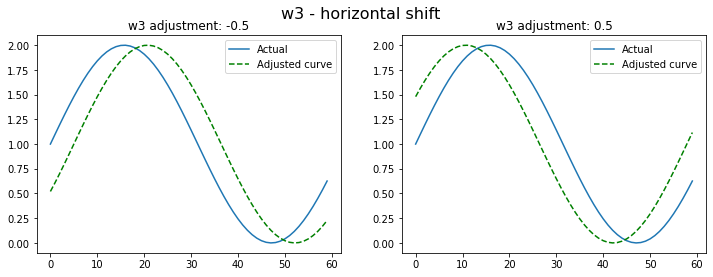

In [57]:
# Plot adjustments
rows = 2
cols = 2
c = 0

d = 0.5

plot_titles = ['w0 - vertical shift', 'w1 - amplitude', 'w2 - frequency', 'w3 - horizontal shift']
w_deltas = [[-d, d], [-d, d], [0.5, 2.0], [-d, d]]

for k in range(4):
    fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(12, 4))
    fig.suptitle(plot_titles[k], fontsize=16)
    #fig.tight_layout()

    c = 0
    
    for i in range(rows):

        # Update weights
        weights_copy = ls.x.copy()
        if k == 2:
            weights_copy[k] *= w_deltas[k][c]            
        else:
            weights_copy[k] += w_deltas[k][c]

        # Create predictions
        pred = ls_pred(x, weights_copy)

        # Plot actual vs predicted
        ax[i].set_title(f'w{k} adjustment: {w_deltas[k][c]}')
        ax[i].plot(y, label='Actual')
        ax[i].plot(pred, label='Adjusted curve', color='green', linestyle='--')
        ax[i].legend()

        c += 1

<font color='blue'> **Excel demonstration** </font>

### 6. Adding segmentation <a id='s6'></a>
Adding another variable to the data and expanding the model to enable modelling of segmentation.

Let $ x_0 $ be our original variable and let's add a second variable $ x_1 $, which is an an integer representing a segment in the data (i.e vintage, APR, limit etc).

Let's expand our original function and include two new $ w $ terms: $ w_4 $ and $ w_5 $ to model the additional variable $ x_1 $:  

$ f(x;w) = w_0 + w_1Sin(w_2x_0 + w_3) + Sin(w_4x_1 + w_5) $


As before we will solve for the optimal weights $ w $

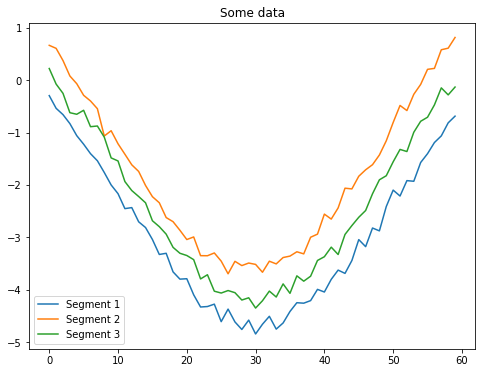

In [58]:
# Create some dummy data and plot it
a, b, c, d = generate_params()

a_offset1 = 1.0
a_offset2 = 0.5
c_factor1 = 1.05
c_factor2 = 1.02

# Data for first segment
df1 = pd.DataFrame()
df1['x1'] = np.arange(n)
df1['x2'] = 1
df1['y'] = a + b * np.sin(c*x/20.0 + d) + np.random.normal(0, 0.1, size=(n, 1)).flatten()

# Data for second segment
df2 = pd.DataFrame()
df2['x1'] = np.arange(n)
df2['x2'] = 2
df2['y'] = (a + a_offset1) + b * np.sin(c*x/20.0 * c_factor1 + d) + np.random.normal(0, 0.1, size=(n, 1)).flatten()

# Data for third segment
df3 = pd.DataFrame()
df3['x1'] = np.arange(n)
df3['x2'] = 3
df3['y'] = (a + a_offset2) + b * np.sin(c*x/20.0 * c_factor2 + d) + np.random.normal(0, 0.1, size=(n, 1)).flatten()

# Combine datasets
df4 = pd.concat([df1, df2, df3], axis=0).reset_index(drop=True)

# Plot
plt.figure(figsize=(8, 6))
plt.title('Actual vs Predicted')
plt.title('Some data')
plt.plot(df4[df4['x2']==1]['x1'], df4[df4['x2']==1]['y'], label='Segment 1')
plt.plot(df4[df4['x2']==2]['x1'], df4[df4['x2']==2]['y'], label='Segment 2')
plt.plot(df4[df4['x2']==3]['x1'], df4[df4['x2']==3]['y'], label='Segment 3')
plt.legend()
plt.show()

In [59]:
# Check the data
df4.tail()

,x1,x2,y
175,55,3,-0.706916
176,56,3,-0.471567
177,57,3,-0.146483
178,58,3,-0.280038
179,59,3,-0.130378


In [60]:
class SineRegressor:
    """
    A class to create a non-linear regression model using the sine function
    """
    
    def __init__(self, n_iter=10, min_cost=1.0, w_bound=0.5):
        """
        Initialise parameters
        """
        self.n_iter = n_iter
        self.min_cost = min_cost
        self.w_bound = w_bound
        self.cost = np.inf
        self.w =[]

    def fit(self, x1, x2, y, verbose=False):
        """
        Fit the model to some data
        """
        min_cost = np.inf
        for i in range(self.n_iter):
            if verbose:
                print(f'iteration: {i}')
                
            w = self._randomise_weights()
            ls = least_squares(self._model_residuals, w, args=(x1, x2, y), method='lm')
            if ls.cost < min_cost:
                min_cost = ls.cost
                min_cost_w = ls.x
                if verbose:
                    print(f'improved model found with cost: {min_cost} \n')
                if min_cost < self.min_cost:
                    break
                    
        if verbose:    
            print(f'final model cost: {min_cost}')
        
        self.cost = min_cost
        self.w = min_cost_w
                
    def predict(self, x1, x2):
        """ 
        Create predictions 
        """
        return (self.w[0] + self.w[1] * np.sin(self.w[2] * x1 + self.w[3]) + (np.sin(self.w[4] * x2 + self.w[5])))
    
    def _model_residuals(self, w, x1, x2, y):
        """ 
        Function to compute residuals 
        """
        return (w[0] + w[1] * np.sin(w[2] * x1 + w[3]) + (np.sin(w[4] * x2 + w[5]))) - y
        
    def _randomise_weights(self):
        """
        Randomise weights
        """
        return np.random.uniform(-self.w_bound, self.w_bound, 6)


In [61]:
# Train the model using Levenberg-Marquardt
sr = SineRegressor(n_iter=20)
sr.fit(df4['x1'], df4['x2'], df4['y'], verbose=True)

iteration: 0
improved model found with cost: 168.1523610979732 

iteration: 1
improved model found with cost: 163.3280347047301 

iteration: 2
iteration: 3
iteration: 4
improved model found with cost: 163.32803466935653 

iteration: 5
improved model found with cost: 1.5509282927765413 

iteration: 6
iteration: 7
improved model found with cost: 1.5509282927765402 

iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
final model cost: 1.5509282927765402


In [62]:
# Check weights
sr.w

array([-2.00095122, -2.52954861, -0.07811691, -2.38391252,  1.46941311,
       -1.64956968])

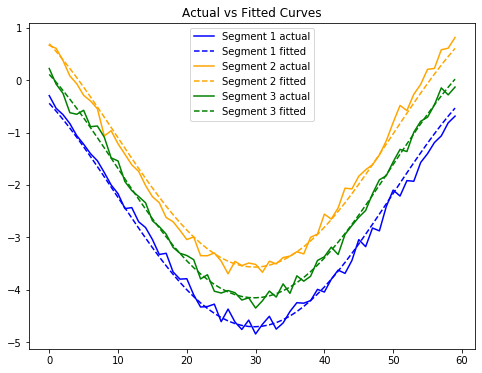

In [63]:
# Create predictions and plot
pred1 = sr.predict(df1['x1'], df1['x2'])
pred2 = sr.predict(df2['x1'], df2['x2'])
pred3 = sr.predict(df3['x1'], df3['x2'])

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.title('Actual vs Fitted Curves')
plt.plot(df1['y'], label='Segment 1 actual', color='blue')
plt.plot(pred1, label='Segment 1 fitted', color='blue', linestyle='--')
plt.plot(df2['y'], label='Segment 2 actual', color='orange')
plt.plot(pred2.reset_index(drop=True), label='Segment 2 fitted', color='orange', linestyle='--')
plt.plot(df3['y'], label='Segment 3 actual', color='green')
plt.plot(pred3.reset_index(drop=True), label='Segment 3 fitted', color='green', linestyle='--')
plt.legend()
plt.show()